# Phase  3                                                    

## Now make only 1 dataframe of 3 csv file using concat/merge /join operation of pandas and start doing EDA . Do the complete EDA in details to explore the insights of data
## and write the detailed observation of each analysis 

# Phase 4
## Write the complete Machine learning code to make predictions of buy  total  price , carpet area  and property type.

In [103]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [104]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [106]:
df1=pd.read_csv('E:/table1.csv')

In [107]:
df2=pd.read_csv('E:/table2.csv')

In [108]:
df3=pd.read_csv('E:/table3.csv')

# Preprocessing


# Convert object type to numeric dataytype for some columns

##### displaying int,float and object columns

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Srno          3163 non-null   int64  
 1   Address       3163 non-null   object 
 2   Beds          3163 non-null   int64  
 3   bathroom      3163 non-null   float64
 4   PropertyType  3163 non-null   object 
 5   Balcony       3163 non-null   int64  
 6   City          3163 non-null   object 
 7   BHKType       3163 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 197.8+ KB


In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CarpetArea    3163 non-null   int64 
 1   Pricepersqft  3163 non-null   int64 
 2   priceinr      3163 non-null   int64 
 3   Status        3163 non-null   object
 4   YearBuilt     3163 non-null   int64 
 5   floor         3163 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 148.4+ KB


In [111]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buytotalprice     3164 non-null   int64 
 1   carparking        3164 non-null   object
 2   Typeofownership   3164 non-null   object
 3   Facing            3164 non-null   object
 4   Bookingamount     3164 non-null   int64 
 5   FurnishingStatus  3164 non-null   object
dtypes: int64(2), object(4)
memory usage: 148.4+ KB


In [112]:
df = pd.concat([df1, df2, df3], axis=1)

In [113]:
df

,Srno,Address,Beds,bathroom,PropertyType,Balcony,City,BHKType,CarpetArea,Pricepersqft,priceinr,Status,YearBuilt,floor,buytotalprice,carparking,Typeofownership,Facing,Bookingamount,FurnishingStatus
0,1.0,"1813 24th Ave Unit A, Seattle, WA 98122",2.0,2.0,Home,1.0,"Seattle, WA",1.0,889.0,602.0,50039.0,ready,2008.0,3.0,535000,yes,individual,east,1000,Semi furnished
1,2.0,"9518 Interlake Ave N, Seattle, WA 98103",3.0,2.0,Home,1.0,"Seattle, WA",1.0,1225.0,694.0,57686.0,ready,2008.0,3.0,850000,yes,individual,east,1000,Semi furnished
2,3.0,"1817 24th Ave Unit A, Seattle, WA 98122",3.0,3.0,Home,1.0,"Seattle, WA",1.0,1470.0,531.0,44137.0,ready,2008.0,3.0,780000,yes,individual,east,1000,Semi furnished
3,4.0,"2206 28th Ave W, Seattle, WA 98199",3.0,1.0,Home,1.0,"Seattle, WA",1.0,958.0,583.0,48459.0,ready,2008.0,3.0,425000,yes,individual,east,1000,Semi furnished
4,5.0,"912 Martin Luther King Jr Way S, Seattle, WA 9...",2.0,1.0,Home,1.0,"Seattle, WA",1.0,729.0,760.0,63172.0,ready,2008.0,3.0,488500,yes,individual,east,1000,Semi furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,3168.0,"6602 E Corrine Dr, Scottsdale, AZ 85254",4.0,4.0,home,2.0,Phoenix,2.0,1448.0,335.0,27846.0,ready,2015.0,6.0,219400,no,individual,east,5550,fully furnished
3160,3169.0,"1219 E Silverwood Dr, Phoenix, AZ 85048",3.0,2.0,home,2.0,Phoenix,2.0,1256.0,271.0,22526.0,ready,2015.0,6.0,1850000,no,individual,east,5551,fully furnished
3161,3170.0,"17818 N 45th Ave, Glendale, AZ 85308",3.0,2.0,home,2.0,Phoenix,2.0,1680.0,223.0,18536.0,ready,2015.0,6.0,485000,no,individual,east,5552,fully furnished
3162,3171.0,"4029 N 75th Dr, Phoenix, AZ 85033",4.0,2.0,home,1.0,Phoenix,2.0,1762.0,293.0,24355.0,ready,2015.0,6.0,340000,no,individual,east,5553,fully furnished


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Srno              3163 non-null   float64
 1   Address           3163 non-null   object 
 2   Beds              3163 non-null   float64
 3   bathroom          3163 non-null   float64
 4   PropertyType      3163 non-null   object 
 5   Balcony           3163 non-null   float64
 6   City              3163 non-null   object 
 7   BHKType           3163 non-null   float64
 8   CarpetArea        3163 non-null   float64
 9   Pricepersqft      3163 non-null   float64
 10  priceinr          3163 non-null   float64
 11  Status            3163 non-null   object 
 12  YearBuilt         3163 non-null   float64
 13  floor             3163 non-null   float64
 14  buytotalprice     3164 non-null   int64  
 15  carparking        3164 non-null   object 
 16  Typeofownership   3164 non-null   object 


In [13]:
# As we have 35 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['buytotalprice', 'Bookingamount'], float64: ['Srno', 'Beds', 'bathroom', 'Balcony', 'BHKType', 'CarpetArea', 'Pricepersqft', 'priceinr', 'YearBuilt', 'floor'], object: ['Address', 'PropertyType', 'City', 'Status', 'carparking', 'Typeofownership', 'Facing', 'FurnishingStatus']}

In [14]:
df.shape

(3164, 20)

In [15]:
df.columns 

Index(['Srno', 'Address', 'Beds', 'bathroom', 'PropertyType', 'Balcony',
       'City', 'BHKType', 'CarpetArea', 'Pricepersqft', 'priceinr', 'Status',
       'YearBuilt', 'floor', 'buytotalprice', 'carparking', 'Typeofownership',
       'Facing', 'Bookingamount', 'FurnishingStatus'],
      dtype='object')

In [16]:
df.describe()

,Srno,Beds,bathroom,Balcony,BHK Type,CarpetArea,Price per sqft,price inr,Year Built,floor,buytotalprice,Booking_amount
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3.164000e+03,3164.000000
mean,1586.336390,2.773633,2.211508,1.869112,2.828328,1769.442934,449.060070,37326.349352,6075.953209,3.193171,7.699645e+05,3806.371681
std,916.108042,1.296119,1.104015,0.357362,0.730596,1231.298329,314.317861,26126.102847,7522.948767,1.919553,1.171701e+06,1171.287561
min,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000e+00,1000.000000
25%,791.500000,2.000000,1.500000,2.000000,2.000000,1053.000000,224.000000,18619.000000,2015.000000,2.000000,3.186500e+05,3174.750000
50%,1588.000000,3.000000,2.000000,2.000000,3.000000,1470.000000,346.000000,28760.000000,2021.000000,2.000000,4.990000e+05,3970.500000
75%,2378.500000,3.000000,2.500000,2.000000,3.000000,2123.000000,617.000000,51286.000000,2022.000000,5.000000,8.799000e+05,4761.250000
max,3171.000000,14.000000,24.000000,2.000000,4.000000,22200.000000,3470.000000,288427.000000,20019.000000,6.000000,3.399500e+07,5554.000000


In [16]:
df.duplicated().sum()

0

In [115]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
Srno                           1        0.031606
CarpetArea                     1        0.031606
floor                          1        0.031606
YearBuilt                      1        0.031606
Status                         1        0.031606
Address                        1        0.031606
Pricepersqft                   1        0.031606
priceinr                       1        0.031606
BHKType                        1        0.031606
City                           1        0.031606
Balcony                        1        0.031606
PropertyType                   1        0.031606
bathroom                       1        0.031606
Beds                           1        0.031606
buytotalprice                  0        0.000000
carparking                     0        0.000000
Typeofownership                0        0.000000
Facing                         0        0.000000
Bookingamount                  0        0.000000
FurnishingStatus    

# Dropping Null values

In [116]:
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))

We had 3164 Rows and 20 Columns before dropping null values.
We have 3163 Rows and 20 Columns after dropping null values.


In [117]:
# Use include='all' option to generate descriptive statistics for all columns
# You can get idea about which column has missing values using this
df.describe()

,Srno,Beds,bathroom,Balcony,BHKType,CarpetArea,Pricepersqft,priceinr,YearBuilt,floor,buytotalprice,Bookingamount
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3.163000e+03,3163.000000
mean,1586.336390,2.773633,2.211508,1.869112,2.828328,1769.442934,449.060070,37326.349352,6075.953209,3.193171,7.700894e+05,3805.819159
std,916.108042,1.296119,1.104015,0.357362,0.730596,1231.298329,314.317861,26126.102847,7522.948767,1.919553,1.171866e+06,1171.060294
min,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000e+00,1000.000000
25%,791.500000,2.000000,1.500000,2.000000,2.000000,1053.000000,224.000000,18619.000000,2015.000000,2.000000,3.184000e+05,3174.500000
50%,1588.000000,3.000000,2.000000,2.000000,3.000000,1470.000000,346.000000,28760.000000,2021.000000,2.000000,4.990000e+05,3970.000000
75%,2378.500000,3.000000,2.500000,2.000000,3.000000,2123.000000,617.000000,51286.000000,2022.000000,5.000000,8.799000e+05,4760.500000
max,3171.000000,14.000000,24.000000,2.000000,4.000000,22200.000000,3470.000000,288427.000000,20019.000000,6.000000,3.399500e+07,5553.000000


In [118]:
df.isnull().sum()  # Will show you null count for each column, but will not count Zeros(0) as null

Srno                0
Address             0
Beds                0
bathroom            0
PropertyType        0
Balcony             0
City                0
BHKType             0
CarpetArea          0
Pricepersqft        0
priceinr            0
Status              0
YearBuilt           0
floor               0
buytotalprice       0
carparking          0
Typeofownership     0
Facing              0
Bookingamount       0
FurnishingStatus    0
dtype: int64

- No missing values in the dataset

In [119]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
Srno                           0             0.0
Address                        0             0.0
Bookingamount                  0             0.0
Facing                         0             0.0
Typeofownership                0             0.0
carparking                     0             0.0
buytotalprice                  0             0.0
floor                          0             0.0
YearBuilt                      0             0.0
Status                         0             0.0
priceinr                       0             0.0
Pricepersqft                   0             0.0
CarpetArea                     0             0.0
BHKType                        0             0.0
City                           0             0.0
Balcony                        0             0.0
PropertyType                   0             0.0
bathroom                       0             0.0
Beds                           0             0.0
FurnishingStatus    

In [22]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

0

<AxesSubplot:>

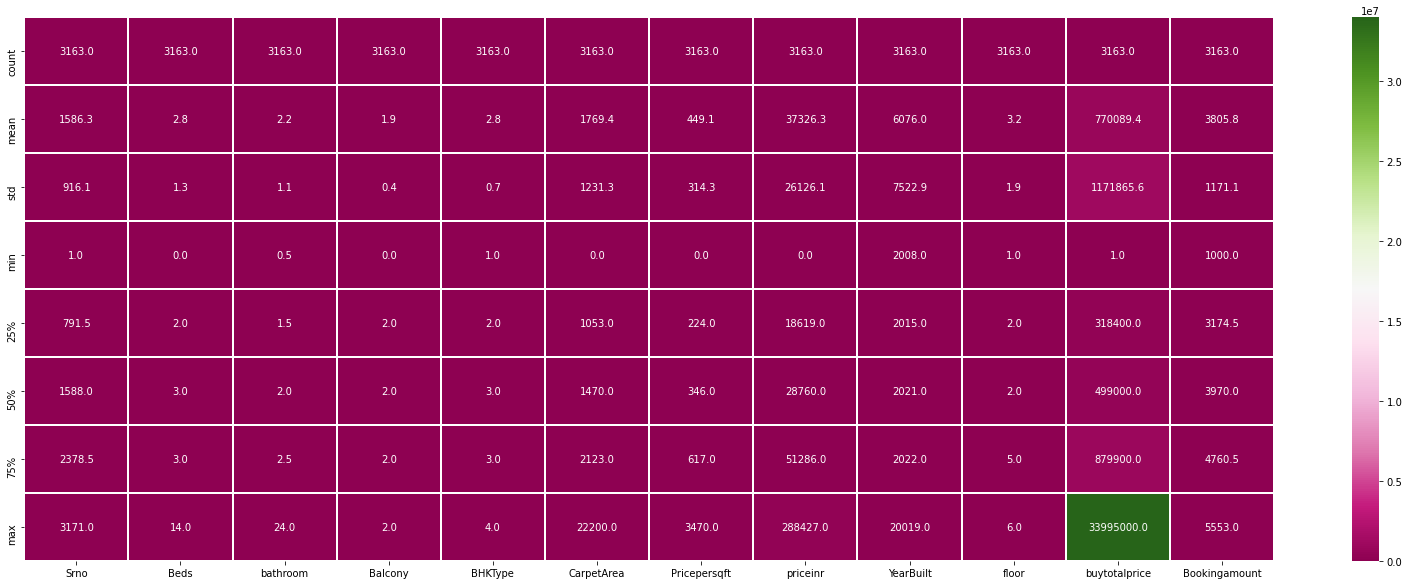

In [23]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [120]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Srno,3163.0,1586.336,916.108,1.0,791.5,1588.0,2378.5,3171.0
Beds,3163.0,2.774,1.296,0.0,2.0,3.0,3.0,14.0
bathroom,3163.0,2.212,1.104,0.5,1.5,2.0,2.5,24.0
Balcony,3163.0,1.869,0.357,0.0,2.0,2.0,2.0,2.0
BHKType,3163.0,2.828,0.731,1.0,2.0,3.0,3.0,4.0
CarpetArea,3163.0,1769.443,1231.298,0.0,1053.0,1470.0,2123.0,22200.0
Pricepersqft,3163.0,449.060,314.318,0.0,224.0,346.0,617.0,3470.0
priceinr,3163.0,37326.349,26126.103,0.0,18619.0,28760.0,51286.0,288427.0
YearBuilt,3163.0,6075.953,7522.949,2008.0,2015.0,2021.0,2022.0,20019.0
floor,3163.0,3.193,1.920,1.0,2.0,2.0,5.0,6.0


<AxesSubplot:xlabel='priceinr'>

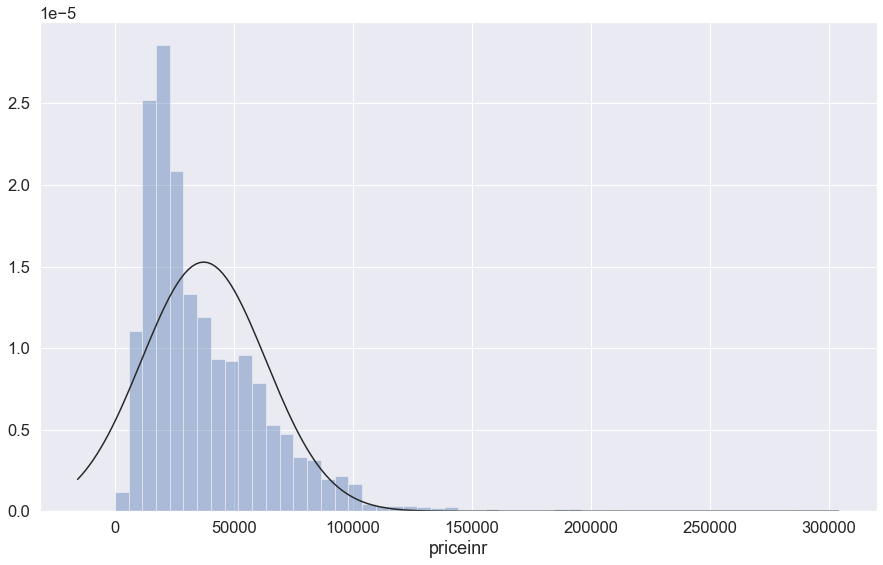

In [25]:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.priceinr, kde=False, fit=norm)

In [ ]:
Average Priceinr distribution shows that for most cases price is between 40000 to 50000

# correlation

<AxesSubplot:>

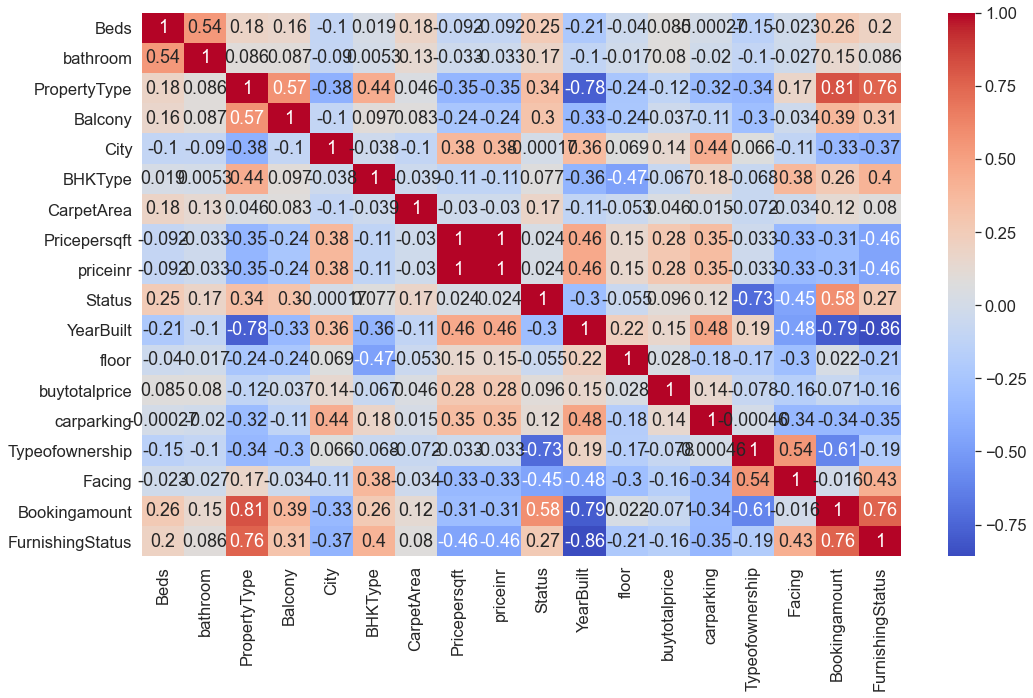

In [47]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [45]:
df.shape

(3163, 18)

yearbuilt is not correlated with booking amount

In [33]:
# Droping unnecessary columns
df.drop(['Srno'], axis=1, inplace=True)

In [40]:
# Droping unnecessary columns
df.drop(['Address'], axis=1, inplace=True)

In [48]:
# Droping unnecessary columns
df.drop(['priceinr'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3162
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Beds              3163 non-null   float64
 1   bathroom          3163 non-null   float64
 2   PropertyType      3163 non-null   float64
 3   Balcony           3163 non-null   float64
 4   City              3163 non-null   float64
 5   BHKType           3163 non-null   float64
 6   CarpetArea        3163 non-null   float64
 7   Pricepersqft      3163 non-null   float64
 8   Status            3163 non-null   float64
 9   YearBuilt         3163 non-null   float64
 10  floor             3163 non-null   float64
 11  buytotalprice     3163 non-null   int64  
 12  carparking        3163 non-null   float64
 13  Typeofownership   3163 non-null   float64
 14  Facing            3163 non-null   float64
 15  Bookingamount     3163 non-null   int64  
 16  FurnishingStatus  3163 non-null   float64


# Skewness

In [50]:
df.skew()

Beds                 0.986265
bathroom             4.011825
PropertyType        -1.386809
Balcony             -2.637324
City                -0.156269
BHKType             -0.111790
CarpetArea           4.084757
Pricepersqft         1.819851
Status               0.070340
YearBuilt            1.314855
floor                0.295488
buytotalprice       16.115203
carparking          -0.238914
Typeofownership      0.515515
Facing               0.850930
Bookingamount       -0.514335
FurnishingStatus    -0.529676
dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3162
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Beds              3163 non-null   float64
 1   bathroom          3163 non-null   float64
 2   PropertyType      3163 non-null   float64
 3   Balcony           3163 non-null   float64
 4   City              3163 non-null   float64
 5   BHKType           3163 non-null   float64
 6   CarpetArea        3163 non-null   float64
 7   Pricepersqft      3163 non-null   float64
 8   Status            3163 non-null   float64
 9   YearBuilt         3163 non-null   float64
 10  floor             3163 non-null   float64
 11  buytotalprice     3163 non-null   int64  
 12  carparking        3163 non-null   float64
 13  Typeofownership   3163 non-null   float64
 14  Facing            3163 non-null   float64
 15  Bookingamount     3163 non-null   int64  
 16  FurnishingStatus  3163 non-null   float64


In [52]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['buytotalprice', 'Bookingamount'], float64: ['Beds', 'bathroom', 'PropertyType', 'Balcony', 'City', 'BHKType', 'CarpetArea', 'Pricepersqft', 'Status', 'YearBuilt', 'floor', 'carparking', 'Typeofownership', 'Facing', 'FurnishingStatus']}

# Encoding categorical data

In [43]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['PropertyType', 'City', 'Status', 'carparking', 'Typeofownership', 'Facing', 'FurnishingStatus']
df=ordinal_encode(df, oe_col)
df.head()

,Beds,bathroom,PropertyType,Balcony,City,BHKType,CarpetArea,Pricepersqft,priceinr,Status,YearBuilt,floor,buytotalprice,carparking,Typeofownership,Facing,Bookingamount,FurnishingStatus
0,2.0,2.0,0.0,1.0,36.0,1.0,889.0,602.0,50039.0,2.0,2008.0,3.0,535000,1.0,3.0,0.0,1000,0.0
1,3.0,2.0,0.0,1.0,36.0,1.0,1225.0,694.0,57686.0,2.0,2008.0,3.0,850000,1.0,3.0,0.0,1000,0.0
2,3.0,3.0,0.0,1.0,36.0,1.0,1470.0,531.0,44137.0,2.0,2008.0,3.0,780000,1.0,3.0,0.0,1000,0.0
3,3.0,1.0,0.0,1.0,36.0,1.0,958.0,583.0,48459.0,2.0,2008.0,3.0,425000,1.0,3.0,0.0,1000,0.0
4,2.0,1.0,0.0,1.0,36.0,1.0,729.0,760.0,63172.0,2.0,2008.0,3.0,488500,1.0,3.0,0.0,1000,0.0


In [63]:
# Splitting data in target and dependent feature
X = df.drop(['buytotalprice'], axis =1)
Y = df['buytotalprice']

KeyError: "['buytotalprice'] not found in axis"

In [64]:
X.shape

(3163, 16)

In [65]:
Y.shape

(3163,)

# Transforming skew data using power transform

In [60]:
from sklearn.preprocessing import power_transform
df = power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Beds                0.042512
bathroom           -0.005169
PropertyType       -0.874884
Balcony            -2.283701
City               -0.315337
BHKType            -0.033583
CarpetArea          0.286207
Pricepersqft        0.008933
Status             -0.127943
YearBuilt           1.314707
floor               0.014586
carparking         -0.238914
Typeofownership    -0.014974
Facing              0.141598
Bookingamount      -0.232299
FurnishingStatus    0.039004
dtype: float64

# Model selection/predictions

# Linear Regression

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

- Creating and Training the Model

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 467293.5435624205
MSE: 2218800014273.7334
RMSE: 1489563.6993004808


In [ ]:
The RMSE is high so we can say that we do not have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

# Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

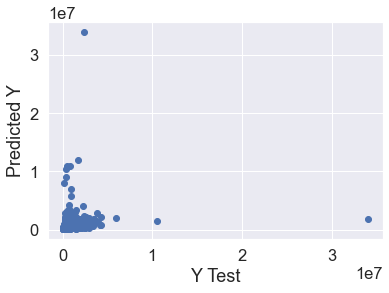

In [73]:
plt.scatter(x=Y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [75]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 660709.9668246446
MSE: 4843787882618.263
RMSE: 2200860.7140430906


# Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,Y_train)
pred=rdr.predict(X_test)

In [77]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))

MAE: 481844.4531234485
MSE: 2288833031590.35
RMSE: 1512888.9686921344


<AxesSubplot:xlabel='buytotalprice', ylabel='Density'>

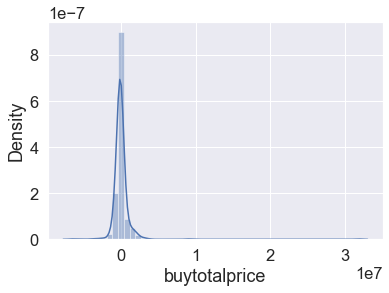

In [79]:
sns.distplot((Y_test-pred),bins=50)

# Random Forest Regressor performs best than linear regression and Decision Tree Regression

,Y Test,Pred
2755,1490000,991426.58
346,329000,388204.97
170,939000,4871149.25
354,419900,510202.61
1556,299900,296151.38


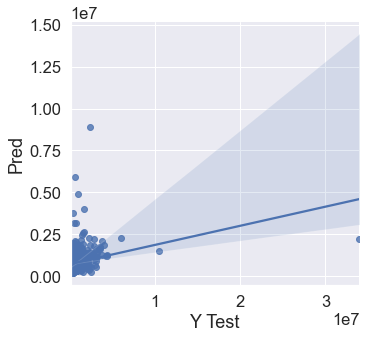

In [80]:
data = pd.DataFrame({'Y Test':Y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

##### Random forest proves to be the most effective in predicting buytotalprice data compared to the Decision Tree Regressor and Linear Regression models.

# Prediction of carpet area

- carpet area is not related to facing,city,status,year built,floor,car parking, type of ownership,facing, booking amount,status

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Beds          3163 non-null   float64
 1   bathroom      3163 non-null   float64
 2   Balcony       3163 non-null   float64
 3   BHKType       3163 non-null   float64
 4   CarpetArea    3163 non-null   float64
 5   Pricepersqft  3163 non-null   float64
dtypes: float64(6)
memory usage: 148.4 KB


In [88]:
# Droping unnecessary columns
df4=df.drop(['PropertyType','City','Status','YearBuilt','floor','carparking','Typeofownership','Facing','Bookingamount','FurnishingStatus'], axis=1, inplace=True)

KeyError: "['PropertyType'] not found in axis"

# Regression model for identification of carpet area

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [93]:
# Splitting data in target and dependent feature
X = df.drop(['CarpetArea'], axis =1)
y = df['CarpetArea']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

- Creating and Training the Model

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [96]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6875836272527536
MSE: 0.8792505953548218
RMSE: 0.9376836328713548


# Decision Tree Regression

In [97]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.9098457272730799
MSE: 1.5816402014298636
RMSE: 1.2576327768589142


# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.7352796076547572
MSE: 1.015031228208268
RMSE: 1.0074875821608265


### Linear regression performs best in finding carpet area

,Y Test,Pred
2755,-0.516509,0.183342
346,-0.730733,-0.128836
170,3.029227,0.118650
354,-1.108118,-0.608322
1556,-0.695929,-0.229865


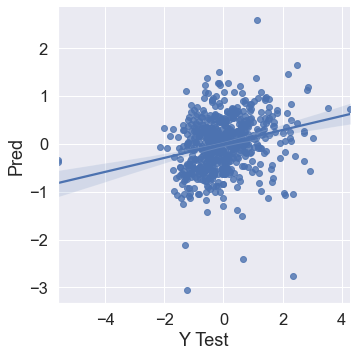

In [101]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Classification of property type using Logistic Regression, Random forest classifier, MultinomialNB, Decisiontree classifier, KNeighborsClassifier,Gaussian classifier

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Beds          3163 non-null   float64
 1   bathroom      3163 non-null   float64
 2   Balcony       3163 non-null   float64
 3   BHKType       3163 non-null   float64
 4   CarpetArea    3163 non-null   float64
 5   Pricepersqft  3163 non-null   float64
dtypes: float64(6)
memory usage: 148.4 KB


In [121]:
df.shape

(3163, 20)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3163 entries, 0 to 3162
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Srno              3163 non-null   float64
 1   Address           3163 non-null   object 
 2   Beds              3163 non-null   float64
 3   bathroom          3163 non-null   float64
 4   PropertyType      3163 non-null   object 
 5   Balcony           3163 non-null   float64
 6   City              3163 non-null   object 
 7   BHKType           3163 non-null   float64
 8   CarpetArea        3163 non-null   float64
 9   Pricepersqft      3163 non-null   float64
 10  priceinr          3163 non-null   float64
 11  Status            3163 non-null   object 
 12  YearBuilt         3163 non-null   float64
 13  floor             3163 non-null   float64
 14  buytotalprice     3163 non-null   int64  
 15  carparking        3163 non-null   object 
 16  Typeofownership   3163 non-null   object 


- property type depends upon beds, bathrooms,balcony,bhk type, carpet area,furnishing status

In [131]:
X=df[['Beds','bathroom','Balcony', 'BHKType', 'CarpetArea','carparking','Typeofownership','FurnishingStatus']] #feature columns
y=df.PropertyType #predictor variable



In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (2530, 8)
Y Train Shape  (2530,)
X Test Shape  (633, 8)
Y Test Shape  (633,)


In [125]:
df

,Srno,Address,Beds,bathroom,PropertyType,Balcony,City,BHKType,CarpetArea,Pricepersqft,priceinr,Status,YearBuilt,floor,buytotalprice,carparking,Typeofownership,Facing,Bookingamount,FurnishingStatus
0,1.0,"1813 24th Ave Unit A, Seattle, WA 98122",2.0,2.0,Home,1.0,"Seattle, WA",1.0,889.0,602.0,50039.0,ready,2008.0,3.0,535000,yes,individual,east,1000,Semi furnished
1,2.0,"9518 Interlake Ave N, Seattle, WA 98103",3.0,2.0,Home,1.0,"Seattle, WA",1.0,1225.0,694.0,57686.0,ready,2008.0,3.0,850000,yes,individual,east,1000,Semi furnished
2,3.0,"1817 24th Ave Unit A, Seattle, WA 98122",3.0,3.0,Home,1.0,"Seattle, WA",1.0,1470.0,531.0,44137.0,ready,2008.0,3.0,780000,yes,individual,east,1000,Semi furnished
3,4.0,"2206 28th Ave W, Seattle, WA 98199",3.0,1.0,Home,1.0,"Seattle, WA",1.0,958.0,583.0,48459.0,ready,2008.0,3.0,425000,yes,individual,east,1000,Semi furnished
4,5.0,"912 Martin Luther King Jr Way S, Seattle, WA 9...",2.0,1.0,Home,1.0,"Seattle, WA",1.0,729.0,760.0,63172.0,ready,2008.0,3.0,488500,yes,individual,east,1000,Semi furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,3167.0,"3605 W Bethany Home Rd #2, Phoenix, AZ 85019",3.0,1.5,home,2.0,Phoenix,2.0,3580.0,517.0,42974.0,ready,2015.0,6.0,425000,no,individual,east,5549,fully furnished
3159,3168.0,"6602 E Corrine Dr, Scottsdale, AZ 85254",4.0,4.0,home,2.0,Phoenix,2.0,1448.0,335.0,27846.0,ready,2015.0,6.0,219400,no,individual,east,5550,fully furnished
3160,3169.0,"1219 E Silverwood Dr, Phoenix, AZ 85048",3.0,2.0,home,2.0,Phoenix,2.0,1256.0,271.0,22526.0,ready,2015.0,6.0,1850000,no,individual,east,5551,fully furnished
3161,3170.0,"17818 N 45th Ave, Glendale, AZ 85308",3.0,2.0,home,2.0,Phoenix,2.0,1680.0,223.0,18536.0,ready,2015.0,6.0,485000,no,individual,east,5552,fully furnished


In [130]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['PropertyType', 'Status', 'carparking', 'Typeofownership', 'FurnishingStatus']
df=ordinal_encode(df, oe_col)
df.head()

,Srno,Address,Beds,bathroom,PropertyType,Balcony,City,BHKType,CarpetArea,Pricepersqft,priceinr,Status,YearBuilt,floor,buytotalprice,carparking,Typeofownership,Facing,Bookingamount,FurnishingStatus
0,1.0,"1813 24th Ave Unit A, Seattle, WA 98122",2.0,2.0,0.0,1.0,"Seattle, WA",1.0,889.0,602.0,50039.0,2.0,2008.0,3.0,535000,1.0,3.0,east,1000,0.0
1,2.0,"9518 Interlake Ave N, Seattle, WA 98103",3.0,2.0,0.0,1.0,"Seattle, WA",1.0,1225.0,694.0,57686.0,2.0,2008.0,3.0,850000,1.0,3.0,east,1000,0.0
2,3.0,"1817 24th Ave Unit A, Seattle, WA 98122",3.0,3.0,0.0,1.0,"Seattle, WA",1.0,1470.0,531.0,44137.0,2.0,2008.0,3.0,780000,1.0,3.0,east,1000,0.0
3,4.0,"2206 28th Ave W, Seattle, WA 98199",3.0,1.0,0.0,1.0,"Seattle, WA",1.0,958.0,583.0,48459.0,2.0,2008.0,3.0,425000,1.0,3.0,east,1000,0.0
4,5.0,"912 Martin Luther King Jr Way S, Seattle, WA 9...",2.0,1.0,0.0,1.0,"Seattle, WA",1.0,729.0,760.0,63172.0,2.0,2008.0,3.0,488500,1.0,3.0,east,1000,0.0


# Logistic Regression model

In [133]:
#Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred_train = logreg.predict(X_train)  
y_pred_test = logreg.predict(X_test)  

#Acuuracy score
print('Accuracy score for Logistic Regression test data is:', accuracy_score(y_test,y_pred_test))


Accuracy score for Logistic Regression test data is: 0.9036334913112164


# Random forest classifier

In [134]:
# Random forest classifier

rfclass = RandomForestClassifier(random_state = 0)
rfclass.fit(X_train, y_train)

y_pred_train = rfclass.predict(X_train)
y_pred_test = rfclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Random Forest :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Random Forest : 0.9778830963665087


# MultinomialNB

In [135]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Applying NB classifier.
#Naive = naive_bayes.MultinomialNB()
nbclass = MultinomialNB()
nbclass.fit(X_train, y_train)
y_pred_train = nbclass.predict(X_train)
y_pred_test = nbclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using Naive Bayes :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using Naive Bayes : 0.7693522906793049


# Decision Tree Classifier

In [136]:
# Applying Decision Tree Classifier.
from sklearn.tree import DecisionTreeClassifier
dtreeclass=DecisionTreeClassifier(max_depth=10,random_state=101,max_features=None,min_samples_leaf=15)
dtreeclass.fit(X_train,y_train)
y_pred_train = dtreeclass.predict(X_train)
y_pred_test = dtreeclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using DecisionTreeClassifier :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using DecisionTreeClassifier : 0.9636650868878357


# KNeighborsClassifier

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knnclass = KNeighborsClassifier(n_neighbors=3)
knnclass.fit(X_train,y_train)
y_pred_train = knnclass.predict(X_train)
y_pred_test = knnclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using KNeighborsClassifier :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using KNeighborsClassifier : 0.7093206951026856


# GaussianNB

In [138]:
from sklearn.naive_bayes import GaussianNB
gaussclass = GaussianNB()
gaussclass.fit(X_train,y_train)
y_pred_train = gaussclass.predict(X_train)
y_pred_test = gaussclass.predict(X_test)

#Accuracy score
print('Accuracy score for test data using GaussianNB :', accuracy_score(y_test,y_pred_test))

Accuracy score for test data using GaussianNB : 0.8641390205371248


### Random forest classifier performs best in prediction of property type